# 0. Exercises and Practice

## Array Manipulations -- From SciPy Lecture Notes

### 1. Form the 2-D array (without typing it in explicitly)::

        [[1,  6, 11],
         [2,  7, 12],
         [3,  8, 13],
         [4,  9, 14],
         [5, 10, 15]]

   and generate a new array containing its 2nd and 4th rows.

In [10]:
#Put your additional code to answer the exercise here!
import numpy as np

print(np.arange(16)[1:].reshape(3, 5).transpose())


[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


### 2. Divide each column of the array ``a`` elementwise with the array ``b``.

(Hint: ``np.newaxis``).

In [1]:
import numpy as np
a = np.arange(25).reshape(5, 5)
b = np.array([1., 5, 10, 15, 20])

In [ ]:
#Put your additional code to answer the exercise here!



### 3. Harder one: Generate a 10 x 3 array of random numbers (in range [0,1]).
   For each row, pick the number closest to 0.5.

   - Use ``abs`` and ``argsort`` to find the column ``j`` closest for
     each row.

   - Use fancy indexing to extract the numbers.  (Hint: ``a[i,j]`` --
     the array ``i`` must contain the row numbers corresponding to stuff in
     ``j``.)

In [ ]:
#Put your additional code to answer the exercise here!



## Some Basic Image Transformations

Our goal in this set of code/exercises is to:
* Create a simple grid of points in 2-D Space
* Applied a graduated color scheme to those points
* Plot the points
* Perform some basic linear transformations on the points (and observe their movements)
* (Advanced) -- Animate the transitions between the points.

The cells below contains quite a bit of ``helper`` code to get going on some of the more difficult portions of these tasks (coloring, animation). If you are feeling adventuresome or confidence, try just adding a cell below THIS... and doing it all yourself! If not, use the portions below to get you jump-started.



In [ ]:
##Blank Cell for the Adventuresome!






### Generating and Plotting the basic, colored points

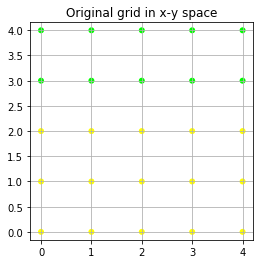

In [25]:
# Visualizing 2D linear transformations as animated gifs
#
# Code originally created by: Raibatak Das
# Date: Nov 2016, Final version Dec. 2016
#
# Modified by: Karl Schmitt
# Modifications REMOVED significant portions for teaching purposes
# Last Modified 8/23/18

## PART 1

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create a grid of points in x-y space 

        # Hint: Use mgrid, but in 2-D space....
xygrid = np.mgrid[0:5, 0:5]
    
    
# Plot original grid points
# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
#     print(y)
#     print(x)
    rValue = min(1, 1-y/3)
    gValue = min(1, 1+y/3)
    bValue = 1/4 + x/16
    return (rValue, gValue, bValue)

# Map grid coordinates to colors
# print(xygrid[0])
# print(xygrid[1])

# print(map(colorizer, xygrid[0], xygrid[1]))
colors = list(map(colorizer, xygrid[0].flatten(), xygrid[1].flatten()))

xx = xygrid[0].flatten()
yy = xygrid[1].flatten()

# Plot x-y grid points 
plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(xygrid[0], xygrid[1], c=colors, edgecolor="none")
# Set axis limits
plt.grid(True)
plt.axis("equal")
plt.title("Original grid in x-y space")

# uncomment to save plot
#plt.savefig("../figures/grid-original.png", dpi=150)
#plt.savefig("../figures/grid-original-small.png", dpi=75)

### Now we'll try some transformations and plot the changed points.

In [ ]:
# Visualizing 2D linear transformations as animated gifs
#
# Code originally created by: Raibatak Das
# Date: Nov 2016, Final version Dec. 2016
#
# Modified by: Karl Schmitt
# Modifications REMOVED significant portions for teaching purposes
# Last Modified 8/23/18

## PART 2

# Transform and plot the grid points

In the cell below, apply a linear transformation using the matrix:

        [[2,  1],
         [-1,  1]]

Store that new matrix as ``uvgrid``

Hint: To do matrix multiplication, use: ``np.dot( <left matrix>, <right matrix> )``

In [ ]:
# Apply linear transform
a = #Define your transformation matrix here
print(a)
uvgrid = # Put your multiplication of a and xygrid here

In [ ]:
def plot_transform(uvgrid, colors):
    # Plot transformed grid points
    plt.figure(figsize=(4, 4), facecolor="w")
    plt.scatter(uvgrid[0], uvgrid[1], c=colors, edgecolor="none")
    plt.grid(True)
    plt.axis("equal")
    plt.title("Transformed grid in u-v space")
    # uncomment to save plot
    #plt.savefig("../figures/grid-transformed.png", dpi=150)
    #plt.savefig("../figures/grid-transformed-small.png", dpi=75)
    
plot_transform(uvgrid, colors)

Let's animate this transformation!

In [ ]:
# To animate the transform, we generate a series of intermediates
# Function to compute all intermediate transforms
def stepwise_transform(a, points, nsteps=30):
    '''
    Generate a series of intermediate transform for the matrix multiplication
      np.dot(a, points) # matrix multiplication
    starting with the identity matrix, where
      a: 2-by-2 matrix
      points: 2-by-n array of coordinates in x-y space 
    returns a (nsteps + 1)x2xn array
    '''
    # create empty array of the right size
    transgrid = np.zeros((nsteps+1,) + np.shape(points))
    for j in range(nsteps+1):
        intermediate = np.eye(2) + j/nsteps*(a - np.eye(2)) # compute intermediate matrix
        transgrid[j] = np.dot(intermediate, points) # apply intermediate matrix transformation
    return transgrid

# Apply to x-y grid
steps = 30
transform = stepwise_transform(a, xygrid, nsteps=steps)

# Create a series of figures showing the intermediate transforms
def make_plots(transarray, color, outdir="png-frames", figuresize=(4,4), figuredpi=150):
    '''
    Generate a series of png images showing a linear transformation stepwise
    '''
    nsteps = transarray.shape[0]
    ndigits = len(str(nsteps)) # to determine filename padding
    maxval = np.abs(transarray.max()) # to set axis limits
    # create directory if necessary
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    # create figure
    plt.ioff()
    fig = plt.figure(figsize=figuresize, facecolor="w")
    for j in range(nsteps): # plot individual frames
        plt.cla()
        plt.scatter(transarray[j,0], transarray[j,1], s=36, c=color, edgecolor="none")
        plt.xlim(1.1*np.array([-maxval, maxval]))
        plt.ylim(1.1*np.array([-maxval, maxval]))
        plt.grid(True)
        plt.draw()
        # save as png
        outfile = os.path.join(outdir, "frame-" + str(j+1).zfill(ndigits) + ".png")
        fig.savefig(outfile, dpi=figuredpi)
    plt.ion()

# Generate figures
make_plots(transform, colors, outdir="tmp")

The following code for making a gif may not work on every system...

In [ ]:
# Convert to gif (works on linux/os-x, requires image-magick)
from subprocess import call
call("cd png-frames && convert -delay 10 frame-*.png ../animation.gif", shell=True)
# Optional: clean up png files
call("rm -f png-frames/*.png", shell=True)

Alright, time for some more challenging transformations...

Here I'll just specify what the transformation.. you'll need to determine what the matrix looks like!

In [ ]:
# Example 2: Rotation
# 60 degree clockwise rotation  -- Hint, you'll need sin and cos...
a = 
print(a)
uvgrid = # generate!
plot_transform(uvgrid, colors)

#Make animations
# Generate intermediates
transform = stepwise_transform(a, xygrid, nsteps=steps)
make_plots(transform, colors)
# see above to create gif

# Example 3: Shear
a =  # shear along x-axis
print(a)
uvgrid = # generate!
plot_transform(uvgrid, colors)

#Make animations
# Generate intermediates
transform = stepwise_transform(a, xygrid, nsteps=steps)
make_plots(transform, colors)
# see above to create gif

# Example 4: Permutation
a = 
print(a)
uvgrid = # generate!
plot_transform(uvgrid, colors)

#Make animations
# Generate intermediates
transform = stepwise_transform(a, xygrid, nsteps=steps)
make_plots(transform, colors)
# see above to create gif

# Example 5: Projection
a = 
print(a)
uvgrid = # generate!
plot_transform(uvgrid, colors)

#Make animations
# Generate intermediates
transform = stepwise_transform(a, xygrid, nsteps=steps)
make_plots(transform, colors)
# see above to create gif

## Picture manipulation: Framing a Face
------------------------------------

Let's do some manipulations on numpy arrays by starting with an image
of a racoon.  ``scipy`` provides a 2D array of this image with the
``scipy.misc.face`` function::

In [ ]:
from scipy import misc
face = misc.face(gray=True)  # 2D grayscale image

Here are a few images we will be able to obtain with our manipulations:
use different colormaps, crop the image, change some parts of the image.

* Create an array of the image with a narrower centering : for example,
    remove 100 pixels from all the borders of the image. To check the result,
    display this new array with ``imshow``.

* We will now frame the face with a black locket. For this, we
    need to create a mask corresponding to the pixels we want to be
    black. The center of the face is around (660, 330), so we defined
    the mask by this condition ``(y-300)**2 + (x-660)**2``

    Change the circle to an ellipsoid.
